In [32]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [33]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 2 & tutorial name: nanosheared-electrolyte
figures will be saved in /docs/sphinx/source/tutorials/figures/level2/nanosheared-electrolyte/


In [34]:
vcm_vs_force = []
for f in range(1000):
    force = f/1000 # kcal/mol/A
    file_name = "force_"+str(force)+"/vcm_fluid.dat"
    if os.path.exists(file_name):
        data_array = np.loadtxt(file_name).T[1][50:]
        vel = np.mean(data_array)
        vcm_vs_force.append([force, vel])
vcm_vs_force = np.array(vcm_vs_force)

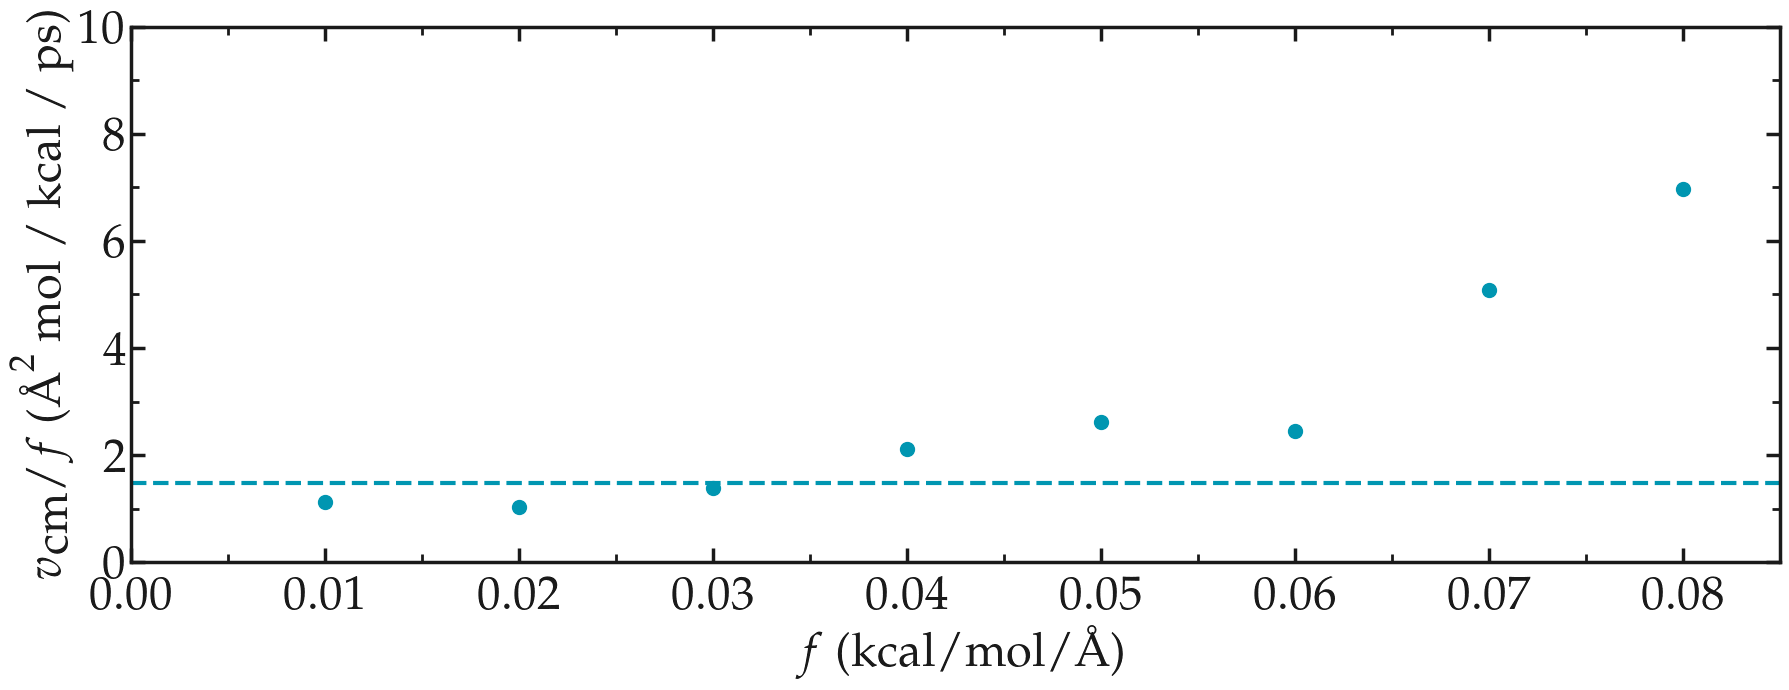

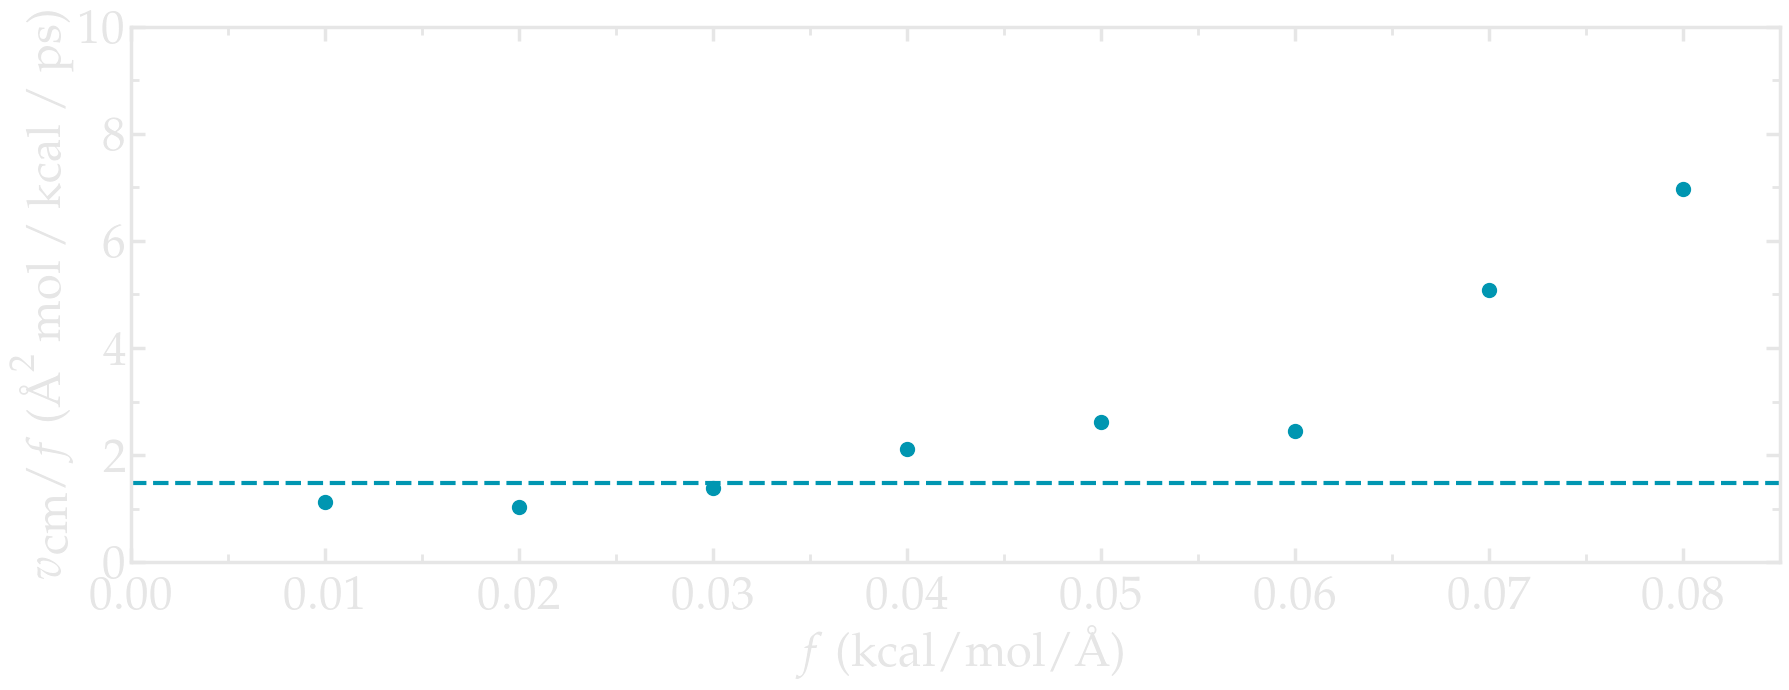

In [35]:
filename = "calibration-force"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,7))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(vcm_vs_force.T[0], 1000 * vcm_vs_force.T[1] / vcm_vs_force.T[0], 'o', markersize = 10, color=colors["myblue"])
    x = np.arange(0, 0.12, 1e-4)
    ax[-1].plot(x, x*0+1.47, '--', linewidth = 3, color=colors["myblue"])
    complete_panel(ax[-1], r'$f$ (kcal/mol/$\textrm{\AA}$)', r'$v_\textrm{cm} / f$ ($\textrm{\AA}^2$ mol / kcal / ps)', legend=False, axis_color=mygray, xpad=10)
    set_boundaries(plt, x_boundaries=(0, 0.085), y_boundaries=(0, 10))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)